In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 27 21:53:34 2015

@author: nymph
"""


#################################### Read the data ############################
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
''' read_csv()
The read_csv() function in pandas package parse an csv data as a DataFrame data structure. What's the endpoint of the data?
The data structure is able to deal with complex table data whose attributes are of all data types. 
Row names, column names in the dataframe can be used to index data.
'''

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

data['mpg']
data.mpg
data.iloc[0,:]

print(data.shape)

################################## Enter your code below ######################


(406, 9)


1. How many cars and how many attributes are in the data set.

In [2]:
print(data.shape)

(406, 9)


2. How many distinct car companies are represented in the data set? What is the name of the car
with the best MPG? What car company produced the most 8-cylinder cars? What are the names
of 3-cylinder cars? Do some internet search that can tell you about the history and popularity of
those 3-cylinder cars.

In [23]:
print(len(data.origin.unique()),"\n")
print(data[data.mpg == data.mpg.max()].car_name.to_string(),"\n")
print(data[data.cylinders == 8].origin.value_counts().idxmax(),"\n")
print(data[data.cylinders == 3].car_name.to_string(),"\n")

3 

329    mazda glc 

1.0 

78     mazda rx2 coupe
118          maxda rx3
250         mazda rx-4
341      mazda rx-7 gs 



3. What is the range, mean, and standard deviation of each attribute? Pay attention to potential
missing values.

In [17]:
#sumary statistics
print(data.dropna().describe(),"\n")

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration       model      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

4. Plot histograms for each attribute. Pay attention to the appropriate choice of number of bins.
Write 2-3 sentences summarizing some interesting aspects of the data by looking at the histograms.

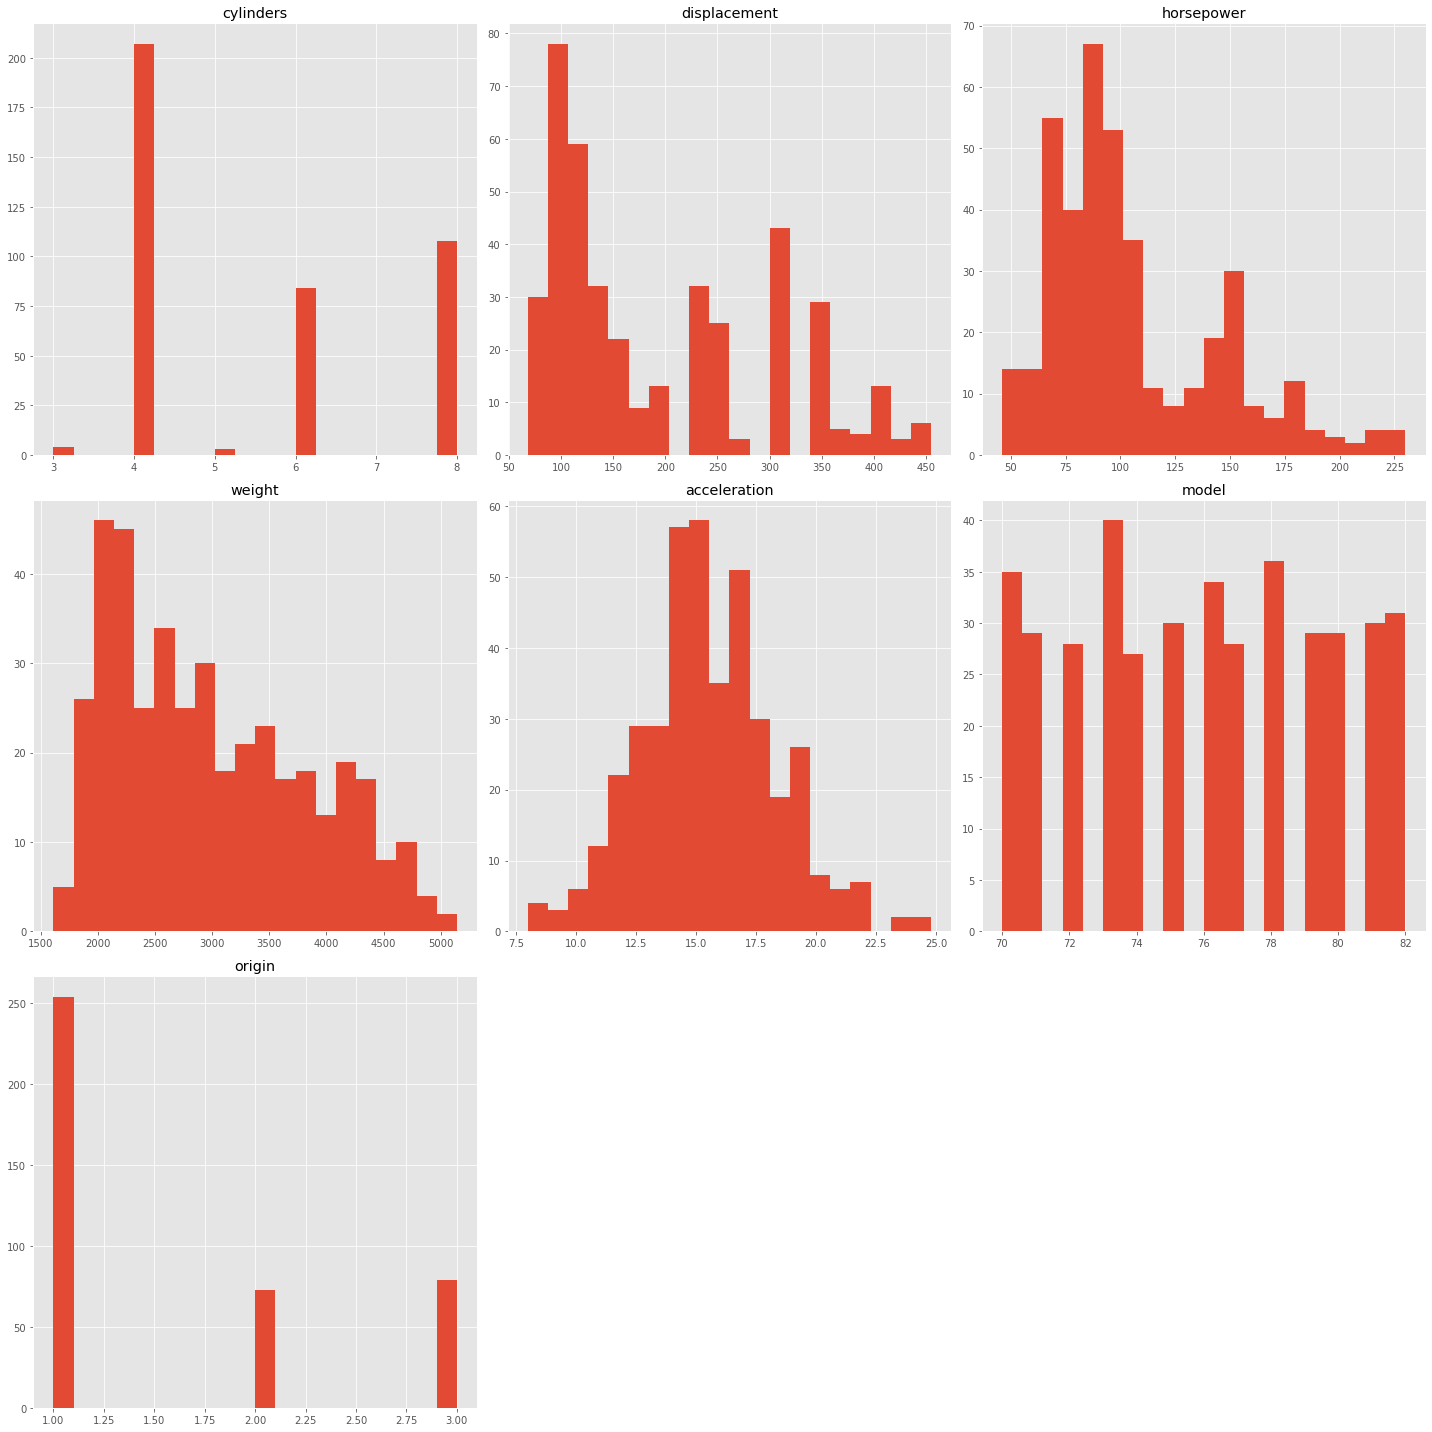

In [18]:
#create 3x3 grid of histograms for each numeric variable
plt.figure(figsize=(20,20))
for i in range(1,4):
    for j in range(1,4):
        if i*3-3+j==8:
            break
        plt.subplot(3,3,i*3-3+j)
        #sns.distplot(data.iloc[:,i*3-3+j], kde=False, bins=20)
        plt.hist(data.iloc[:,i*3-3+j], bins=20)
        plt.title(data.columns[i*3-3+j])
plt.tight_layout()
plt.show()


cyclinder thường là số chẵn, chỉ có số ít model là số lẻ là 3 và 5, không có xe nào có 7 cyclinder. Xe của hãng sản xuất 1.0 chiếm hơn một nửa dữ liệu. Đồ thị trọng lượng của xe, mã lực và displacement là right skew, có thể có sự liên quan nhất định với các thuộc tính này. 

5. Plot a scatterplot of weight vs. MPG attributes. What do you conclude about the relationship
between the attributes? What is the correlation coefficient between the 2 attributes?

Text(0, 0.5, 'weight')

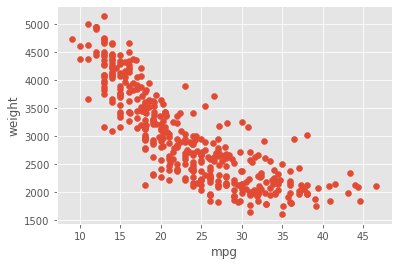

In [6]:
#sns.relplot(x="mpg", y="weight", data=data)
plt.scatter(data.mpg, data.weight)
plt.xlabel('mpg')
plt.ylabel('weight')

2 thuộc tính rõ ràng có tồn tại quan hệ với nhau, với quan hệ tuyến tính.

In [7]:
data.loc[:,["mpg","weight"]].corr()

,mpg,weight
mpg,1.000000,-0.831741
weight,-0.831741,1.000000


6. Plot a scatterplot of year vs. cylinders attributes. Add a small random noise to the values to make
the scatterplot look nicer. What can you conclude? Do some internet search about the history of car
industry during 70’s that might explain the results.(Hint: data.mpg + np.random.random(len(data.mpg))
will add small random noise)

Text(0.5, 1.0, 'cylinders vs year model')

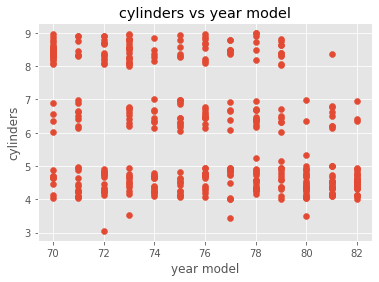

In [8]:
#sns.regplot(x='model',y='cylinders',data=data,x_jitter=.5,y_jitter=.5,fit_reg=False)
plt.scatter(data.model, data.cylinders + np.random.random(len(data.cylinders)))
plt.xlabel('year model')
plt.ylabel('cylinders')
plt.title('cylinders vs year model')

cyclinder có xu hướng giảm dần qua các năm.

7. Show 2 more scatterplots that are interesting do you. Discuss what you see.

Text(0, 0.5, 'acceleration')

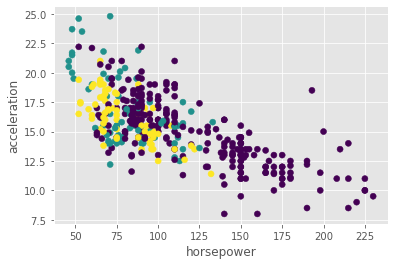

In [9]:
plt.scatter(data.horsepower, data.acceleration,c=data.origin)
plt.xlabel('horsepower')
plt.ylabel('acceleration')

Text(0, 0.5, 'horsepower')

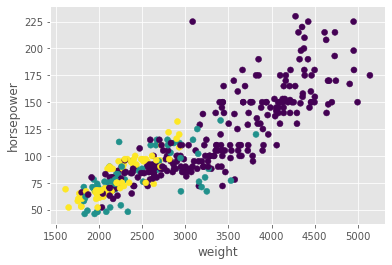

In [10]:
plt.scatter(data.weight, data.horsepower, c=data.origin)
plt.xlabel('weight')
plt.ylabel('horsepower')

rõ ràng tồn tại quan hệ giữa các thuộc tính này.

Text(0.5, 1.0, 'year')

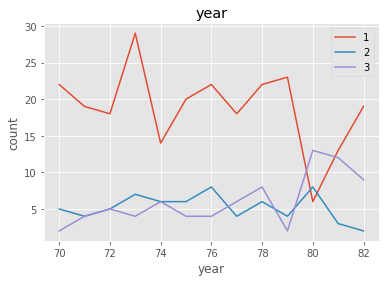

In [11]:
tempt=data.dropna().groupby(['origin','model']).count()
tempt=tempt.reset_index()
plt.plot(tempt.loc[tempt.origin==1].model, tempt.loc[tempt.origin==1].mpg)
plt.plot(tempt.loc[tempt.origin==2].model, tempt.loc[tempt.origin==2].mpg)
plt.plot(tempt.loc[tempt.origin==3].model, tempt.loc[tempt.origin==3].mpg)
plt.legend(['1','2','3'])
plt.xlabel('year')
plt.ylabel('count')
plt.title('year')
#Không biết thầy có nhầm đề bài không vì có rất nhiều hãng xe và dữ liệu thưa cho từng hãng đễ plot timeseries cho từng hãng

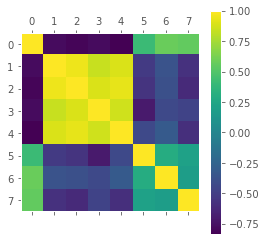

In [12]:
plt.matshow(data.iloc[:,0:8].corr())
plt.grid(False)
plt.colorbar()

có quan hệ tuyến tính mạnh giữa các atribute từ 1-4, các atribute 5-7 cũng phụ thuộc nhiều vào 1-4 